# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

units = "imperial"

maxtemp = []
humidity = []
cloudiness = []
windspeed = []
cities_names = []
lat = []
lng = []
country = []
date = []
record_count = 1

print("Beginning Data Retrieval")
print("----------------------------")
for x in range(len(cities)): 
    query_url = f"{base_url}{cities[x]}&appid={weather_api_key}&units={units}"
    
    weather_data = requests.get(query_url).json()
    try:
        maxtemp.append(weather_data["main"]["temp_max"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        windspeed.append(weather_data["wind"]["speed"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        country.append(weather_data["sys"]["country"])
        cities_names.append(cities[x])
        date.append(weather_data["dt"])
        
        print(f"Processing Record {record_count} | {cities[x]}")
        
        record_count += 1
        
        time.sleep(1)
        
    except:
        print(f"City not found skipping...")

Beginning Data Retrieval
----------------------------
Processing Record 1 | alta floresta
Processing Record 2 | kapaa
Processing Record 3 | tomatlan
Processing Record 4 | albany
Processing Record 5 | rikitea
Processing Record 6 | castro
Processing Record 7 | bluff
Processing Record 8 | severo-kurilsk
Processing Record 9 | ushuaia
Processing Record 10 | saskylakh
Processing Record 11 | ilulissat
Processing Record 12 | vaini
Processing Record 13 | cherskiy
Processing Record 14 | bonwapitse
Processing Record 15 | qaanaaq
Processing Record 16 | nikolskoye
Processing Record 17 | sao joao da barra
Processing Record 18 | busselton
Processing Record 19 | hualmay
Processing Record 20 | victoria
Processing Record 21 | presidente medici
Processing Record 22 | adrar
City not found skipping...
City not found skipping...
Processing Record 23 | nikel
Processing Record 24 | yellowknife
Processing Record 25 | santa cruz
Processing Record 26 | hobart
Processing Record 27 | mahebourg
City not found skipp

Processing Record 229 | caltagirone
Processing Record 230 | conde
Processing Record 231 | lagoa
Processing Record 232 | phuket
Processing Record 233 | te anau
Processing Record 234 | nome
Processing Record 235 | chatakonda
City not found skipping...
Processing Record 236 | tateyama
Processing Record 237 | tiksi
Processing Record 238 | leningradskiy
Processing Record 239 | kununurra
Processing Record 240 | kilis
Processing Record 241 | kavieng
Processing Record 242 | gallup
Processing Record 243 | longyearbyen
Processing Record 244 | saldanha
Processing Record 245 | canutama
Processing Record 246 | portobelo
Processing Record 247 | puerto madero
Processing Record 248 | sibolga
Processing Record 249 | catabola
Processing Record 250 | marevo
Processing Record 251 | mala vyska
City not found skipping...
Processing Record 252 | karratha
Processing Record 253 | provideniya
Processing Record 254 | verkhoyansk
Processing Record 255 | pineville
Processing Record 256 | akonolinga
Processing Reco

Processing Record 465 | arlit
Processing Record 466 | salobrena
Processing Record 467 | russell
Processing Record 468 | kerema
Processing Record 469 | bridlington
Processing Record 470 | parabel
Processing Record 471 | bundaberg
Processing Record 472 | north kessock
Processing Record 473 | vila velha
Processing Record 474 | souillac
Processing Record 475 | togur
Processing Record 476 | miri
Processing Record 477 | kloulklubed
Processing Record 478 | kudahuvadhoo
Processing Record 479 | korla
Processing Record 480 | nhulunbuy
Processing Record 481 | crib point
Processing Record 482 | vestmannaeyjar
Processing Record 483 | burgeo
Processing Record 484 | hambantota
Processing Record 485 | tamiahua
Processing Record 486 | ukmerge
Processing Record 487 | bhit shah
Processing Record 488 | shelburne
Processing Record 489 | uyemskiy
Processing Record 490 | allapalli
Processing Record 491 | haines junction
Processing Record 492 | nelson bay
Processing Record 493 | bharatpur
Processing Record 49

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City": cities_names,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": maxtemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": windspeed,
                          "Country": country,
                          "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alta floresta,-9.8756,-56.0861,75.65,95,100,3.60,BR,1613166582
1,kapaa,22.0752,-159.3190,77.00,64,20,10.36,US,1613166583
2,tomatlan,19.9333,-105.2500,77.68,46,0,13.00,MX,1613166584
3,albany,42.6001,-73.9662,19.00,36,92,3.40,US,1613166585
4,rikitea,-23.1203,-134.9692,80.31,70,30,9.22,PF,1613166586


In [5]:
outfile = "../output_data/cities.csv"
weather_df.to_csv(outfile, index=False)
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,18.325621,15.646374,50.503917,74.136667,54.006667,8.196550,1.613167e+09
std,32.994233,90.411034,32.208120,18.870740,38.346195,6.239374,3.421904e+02
min,-54.800000,-179.166700,-36.650000,14.000000,0.000000,0.220000,1.613166e+09
25%,-9.095425,-65.114550,28.400000,64.000000,20.000000,3.572500,1.613167e+09
50%,19.925000,19.637400,63.000000,78.000000,66.500000,6.910000,1.613167e+09
75%,45.302625,96.425025,77.000000,88.000000,90.000000,11.070000,1.613167e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,49.170000,1.613168e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
data_file = "../output_data/cities.csv"
city_data = pd.read_csv(data_file)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alta floresta,-9.8756,-56.0861,75.65,95,100,3.60,BR,1613166582
1,kapaa,22.0752,-159.3190,77.00,64,20,10.36,US,1613166583
2,tomatlan,19.9333,-105.2500,77.68,46,0,13.00,MX,1613166584
3,albany,42.6001,-73.9662,19.00,36,92,3.40,US,1613166585
4,rikitea,-23.1203,-134.9692,80.31,70,30,9.22,PF,1613166586


In [7]:
#  Get the indices of cities that have humidity over 100%.
index100 = city_data.loc[city_data["Humidity"] > 100, :].index
index100

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index=index100)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alta floresta,-9.8756,-56.0861,75.65,95,100,3.60,BR,1613166582
1,kapaa,22.0752,-159.3190,77.00,64,20,10.36,US,1613166583
2,tomatlan,19.9333,-105.2500,77.68,46,0,13.00,MX,1613166584
3,albany,42.6001,-73.9662,19.00,36,92,3.40,US,1613166585
4,rikitea,-23.1203,-134.9692,80.31,70,30,9.22,PF,1613166586


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
# function to create plots
def createPlots(x_param, y_param, title, xlabel, ylabel):
    clean_city_data.plot(x_param, y_param, kind="scatter")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

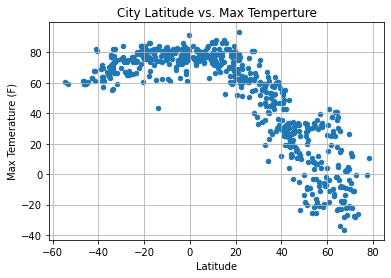

In [10]:
x = "Lat"
y = "Max Temp"
title = "City Latitude vs. Max Temperture"
xlabel = "Latitude"
ylabel = "Max Temerature (F)"
createPlots(x, y, title, xlabel, ylabel)

## Latitude vs. Humidity Plot

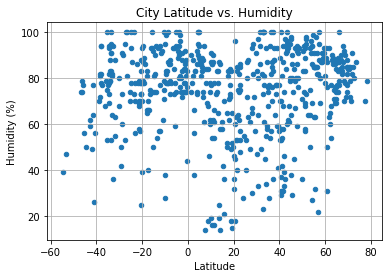

In [11]:
x = "Lat"
y = "Humidity"
title = "City Latitude vs. Humidity"
xlabel = "Latitude"
ylabel = "Humidity (%)"
createPlots(x, y, title, xlabel, ylabel)

## Latitude vs. Cloudiness Plot

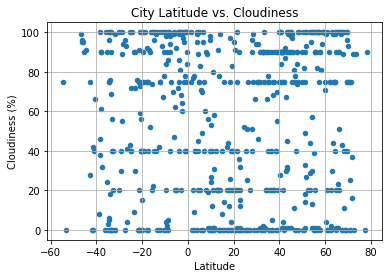

In [12]:
x = "Lat"
y = "Cloudiness"
title = "City Latitude vs. Cloudiness"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
createPlots(x, y, title, xlabel, ylabel)

## Latitude vs. Wind Speed Plot

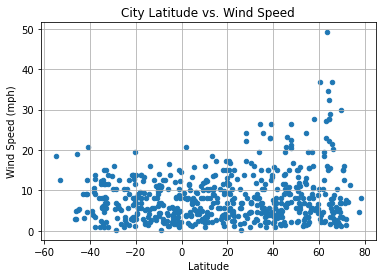

In [13]:
x = "Lat"
y = "Wind Speed"
title = "City Latitude vs. Wind Speed"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
createPlots(x, y, title, xlabel, ylabel)

## Linear Regression

In [26]:
northern_data = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]
southern_data = clean_city_data.loc[clean_city_data["Lat"] <= 0, :]

def linearRegression(x_values, y_values, eq_coord, xlabel, ylabel):
    # order of values returned is very imoportant, name them properly
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # x values in first
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    print(f"The r squared value is {r_squared}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # annotate plots at (x, y) at lower left corner of string
    plt.annotate(line_eq,(eq_coord),fontsize=12,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.7832190326493275


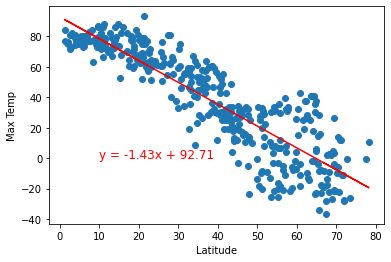

In [28]:
x = northern_data["Lat"]
y = northern_data["Max Temp"]
eq_coord = (10, 0)
xlabel = "Latitude"
ylabel = "Max Temp"
linearRegression(x, y, eq_coord, xlabel, ylabel)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.2668967532621585


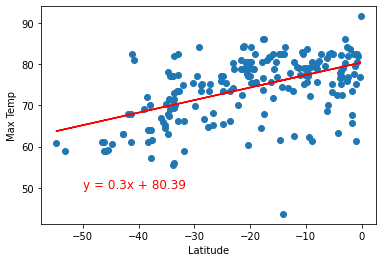

In [29]:
x = southern_data["Lat"]
y = southern_data["Max Temp"]
eq_coord = (-50, 50)
xlabel = "Latitude"
ylabel = "Max Temp"
linearRegression(x, y, eq_coord, xlabel, ylabel)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.04928631675609767


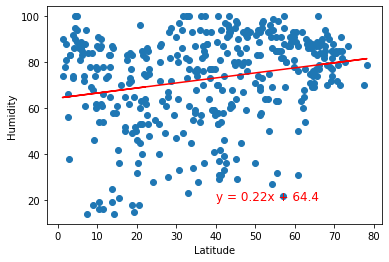

In [31]:
x = northern_data["Lat"]
y = northern_data["Humidity"]
eq_coord = (40, 20)
xlabel = "Latitude"
ylabel = "Humidity"
linearRegression(x, y, eq_coord, xlabel, ylabel)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.06210409126516874


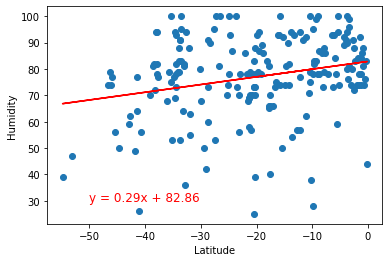

In [32]:
x = southern_data["Lat"]
y = southern_data["Humidity"]
eq_coord = (-50, 30)
xlabel = "Latitude"
ylabel = "Humidity"
linearRegression(x, y, eq_coord, xlabel, ylabel)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.03672842759570186


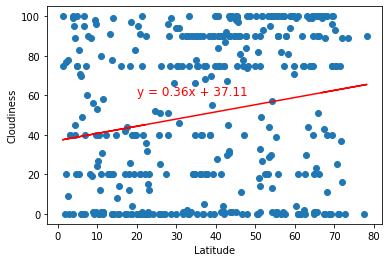

In [33]:
x = northern_data["Lat"]
y = northern_data["Cloudiness"]
eq_coord = (20, 60)
xlabel = "Latitude"
ylabel = "Cloudiness"
linearRegression(x, y, eq_coord, xlabel, ylabel)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.039120913874112595


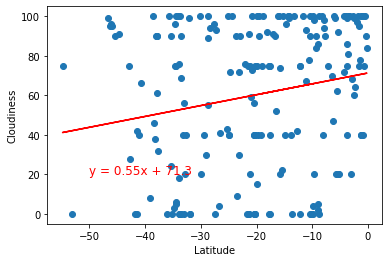

In [34]:
x = southern_data["Lat"]
y = southern_data["Cloudiness"]
eq_coord = (-50, 20)
xlabel = "Latitude"
ylabel = "Cloudiness"
linearRegression(x, y, eq_coord, xlabel, ylabel)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.024648981200468757


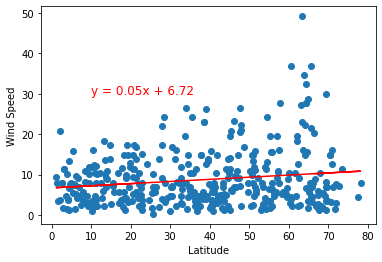

In [35]:
x = northern_data["Lat"]
y = northern_data["Wind Speed"]
eq_coord = (10, 30)
xlabel = "Latitude"
ylabel = "Wind Speed"
linearRegression(x, y, eq_coord, xlabel, ylabel)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.025081135536949246


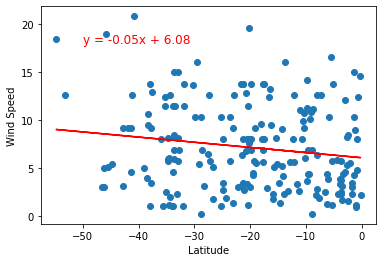

In [36]:
x = southern_data["Lat"]
y = southern_data["Wind Speed"]
eq_coord = (-50, 18)
xlabel = "Latitude"
ylabel = "Wind Speed"
linearRegression(x, y, eq_coord, xlabel, ylabel)